
<img src = 'IDH.jpg' style = "width: 20%"/>

O índice de Desenvolvimento Humano (IDH) é um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano: 
- uma vida longa e saudável: expectativa de vida ao nascer;
- o acesso ao conhecimento: Anos Médios de Estudo e Anos Esperados de Escolaridade;
- um padrão de vida decente: PIB (PPC) per capita;

É uma medida comparativa usada para classificar os países pelo seu grau de "desenvolvimento humano" e para ajudar a classificar os países como desenvolvidos (desenvolvimento humano muito alto), em desenvolvimento (desenvolvimento humano médio e alto) e subdesenvolvidos (desenvolvimento humano baixo).

O desenvolvimento humano é classificado conforme o enquadramento do IDH em um dos quatro intervalos abaixo.

- < 0,550: Baixo
- 0,550 - 0,699: Médio
- 0,700 - 0,799: Alto
- \>= 0,800: Muito Alto

A nota técnica localizada em http://hdr.undp.org/sites/default/files/hdr2020_technical_notes.pdf contém detalhes sobre como o IDH é calculado.

A base utilizada no trabalho está localizada em: https://hdr.undp.org/en/indicators/137506

O objetivo desse trabalho é mostrar a relação entre o IDH e o ranking de felicidade dos países países membros da ONU.

Referências:

- https://pt.wikipedia.org/wiki/%C3%8Dndice_de_Desenvolvimento_Humano
- https://www.kaggle.com/datasets/unsdsn/world-happiness
- https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#:~:text=0.7%20a%200.9%20positivo%20ou,negativo%20indica%20uma%20correla%C3%A7%C3%A3o%20desprez%C3%ADvel.
- https://canaldafelicidade.com.br/relatorio-mundial-da-felicidade/

O Relatório Mundial da Felicidade é uma pesquisa notável que indica o estado de felicidade global em mais de 150 países com base na satisfação dos cidadãos em relação às suas vidas. O propósito da pesquisa é entender mais a fundo sobre o bem-estar e usar os dados para acompanhar a satisfação e qualidade de vida ao redor do mundo.  O resultado do ranking global de felicidade depende, exclusivamente, da avaliação individual das pessoas nos últimos três anos. Então, ao falarmos da edição de 2020, o índice considera os dados de 2017 a 2019. Simplificando, é como pedir para alguém responder, de 0 a 10, quão satisfeito está com a sua vida hoje, onde ‘10’ representa a melhor situação possível e ‘0’ representa a pior situação possível.

In [233]:
#importar de bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

## Preparação da base de IDH

In [196]:
#importar base de IDH
df_base_idh = pd.read_excel('idh_base.xlsx')

In [197]:
df_base_idh

,HDI Rank,Country,2015,2016,2017,2018,2019
0,1,Norway,0.947,0.950,0.954,0.956,0.957
1,2,Ireland,0.935,0.943,0.947,0.951,0.955
2,2,Switzerland,0.947,0.947,0.949,0.955,0.955
3,4,"Hong Kong, China (SAR)",0.930,0.936,0.941,0.946,0.949
4,4,Iceland,0.934,0.941,0.943,0.946,0.949
...,...,...,...,...,...,...,...
184,185,Burundi,0.437,0.438,0.434,0.431,0.433
185,185,South Sudan,0.425,0.421,0.426,0.429,0.433
186,187,Chad,0.398,0.393,0.396,0.397,0.398
187,188,Central African Republic,0.375,0.382,0.391,0.395,0.397


In [198]:
#renomear colunas
df_base_idh.rename(columns = {'HDI Rank':'hdi_rank', 'Country':'country'}, inplace = True)

In [199]:
#verificar os nulos
df_base_idh.isnull().sum()

hdi_rank    0
country     0
2015        0
2016        0
2017        0
2018        0
2019        0
dtype: int64

In [200]:
#transformar as colunas de anos em linhas
df_base_idh = df_base_idh.melt(id_vars=['hdi_rank', 'country'], 
        var_name="year", 
        value_name="hdi_score")
df_base_idh.head()

,hdi_rank,country,year,hdi_score
0,1,Norway,2015,0.947
1,2,Ireland,2015,0.935
2,2,Switzerland,2015,0.947
3,4,"Hong Kong, China (SAR)",2015,0.930
4,4,Iceland,2015,0.934


In [204]:
#tamanho da base
df_base_idh.size

3780

In [205]:
#paises
df_base_idh.country.unique()

array([' Norway', ' Ireland', ' Switzerland', ' Hong Kong, China (SAR)',
       ' Iceland', ' Germany', ' Sweden', ' Australia', ' Netherlands',
       ' Denmark', ' Finland', ' Singapore', ' United Kingdom',
       ' Belgium', ' New Zealand', ' Canada', ' United States',
       ' Austria', ' Israel', ' Japan', ' Liechtenstein', ' Slovenia',
       ' Korea (Republic of)', ' Luxembourg', ' Spain', ' France',
       ' Czechia', ' Malta', ' Estonia', ' Italy',
       ' United Arab Emirates', ' Greece', ' Cyprus', ' Lithuania',
       ' Poland', ' Andorra', ' Latvia', ' Portugal', ' Slovakia',
       ' Hungary', ' Saudi Arabia', ' Bahrain', ' Chile', ' Croatia',
       ' Qatar', ' Argentina', ' Brunei Darussalam', ' Montenegro',
       ' Romania', ' Palau', ' Kazakhstan', ' Russian Federation',
       ' Belarus', ' Turkey', ' Uruguay', ' Bulgaria', ' Panama',
       ' Bahamas', ' Barbados', ' Oman', ' Georgia', ' Costa Rica',
       ' Malaysia', ' Kuwait', ' Serbia', ' Mauritius', ' Seyche

In [206]:
#remover os espaços laterais dos países
df_base_idh['country'] = df_base_idh['country'].str.lstrip()

## Preparação da base de felicidade

In [10]:
#importar base de felicidade dos anos
df_base_hpnss_2015 = pd.read_excel('2015.xlsx')

In [13]:
df_base_hpnss_2016 = pd.read_excel('2016.xlsx')

In [15]:
df_base_hpnss_2017 = pd.read_excel('2017.xlsx')

In [16]:
df_base_hpnss_2018 = pd.read_excel('2018.xlsx')

In [17]:
df_base_hpnss_2019 = pd.read_excel('2019.xlsx')

In [43]:
print(df_base_hpnss_2015.columns)
print(df_base_hpnss_2015.columns.size)
print(df_base_hpnss_2016.columns)
print(df_base_hpnss_2016.columns.size)
print(df_base_hpnss_2017.columns)
print(df_base_hpnss_2017.columns.size)
print(df_base_hpnss_2018.columns)
print(df_base_hpnss_2018.columns.size)
print(df_base_hpnss_2019.columns)
print(df_base_hpnss_2019.columns.size)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
12
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
13
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
12
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
  

In [46]:
#remover as colunas de interesse
df_base_hpnss_2015 = df_base_hpnss_2015.iloc[:, [0, 2, 3]]

In [54]:
#renomear colunas
df_base_hpnss_2015.rename(columns = {'Country':'country', 'Happiness Rank':'h_rank', 'Happiness Score': 'h_score'}, inplace = True)

In [55]:
#criar coluna de anos
df_base_hpnss_2015['year'] = 2015

In [56]:
df_base_hpnss_2015.head()

,country,h_rank,h_score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015


In [47]:
df_base_hpnss_2016 = df_base_hpnss_2016.iloc[:, [0, 2, 3]]

In [59]:
df_base_hpnss_2016.rename(columns = {'Country':'country', 'Happiness Rank':'h_rank', 'Happiness Score': 'h_score'}, inplace = True)

In [60]:
df_base_hpnss_2016['year'] = 2016

In [61]:
df_base_hpnss_2016.head()

,country,h_rank,h_score,year
0,Denmark,1,7.526,2016
1,Switzerland,2,7.509,2016
2,Iceland,3,7.501,2016
3,Norway,4,7.498,2016
4,Finland,5,7.413,2016


In [88]:
df_base_hpnss_2017 = df_base_hpnss_2017.iloc[:, 0:3]

In [91]:
df_base_hpnss_2017.rename(columns = {'Country':'country', 'Happiness Rank':'h_rank', 'Happiness Score': 'h_score'}, inplace = True)

In [92]:
df_base_hpnss_2017['year'] = 2017

In [93]:
df_base_hpnss_2017.head()

,country,h_rank,h_score,year
0,Denmark,1,7.526,2017
1,Switzerland,2,7.509,2017
2,Iceland,3,7.501,2017
3,Norway,4,7.498,2017
4,Finland,5,7.413,2017


In [50]:
df_base_hpnss_2018 = df_base_hpnss_2018.iloc[:, 0:3]

In [65]:
df_base_hpnss_2018.rename(columns = {'Country or region':'country', 'Overall rank':'h_rank', 'Score': 'h_score'}, inplace = True)

In [66]:
df_base_hpnss_2018['year'] = 2018

In [67]:
df_base_hpnss_2018.head()

,h_rank,country,h_score,year
0,1,Finland,7.632,2018
1,2,Norway,7.594,2018
2,3,Denmark,7.555,2018
3,4,Iceland,7.495,2018
4,5,Switzerland,7.487,2018


In [51]:
df_base_hpnss_2019 = df_base_hpnss_2019.iloc[:, 0:3]

In [68]:
df_base_hpnss_2019.rename(columns = {'Country or region':'country', 'Overall rank':'h_rank', 'Score': 'h_score'}, inplace = True)

In [69]:
df_base_hpnss_2019['year'] = 2019

In [71]:
df_base_hpnss_2019.head()

,h_rank,country,h_score,year
0,1,Finland,7.769,2019
1,2,Denmark,7.600,2019
2,3,Norway,7.554,2019
3,4,Iceland,7.494,2019
4,5,Netherlands,7.488,2019


In [107]:
#inserir em um único dataframe os scores de todos os anos
df_base_hpnss = pd.DataFrame()
df_base_hpnss = df_base_hpnss.append(df_base_hpnss_2015)
df_base_hpnss = df_base_hpnss.append(df_base_hpnss_2016)
df_base_hpnss = df_base_hpnss.append(df_base_hpnss_2017)
df_base_hpnss = df_base_hpnss.append(df_base_hpnss_2018)
df_base_hpnss = df_base_hpnss.append(df_base_hpnss_2019)

In [108]:
df_base_hpnss

,country,h_rank,h_score,year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015
...,...,...,...,...
151,Rwanda,152,3.334,2019
152,Tanzania,153,3.231,2019
153,Afghanistan,154,3.203,2019
154,Central African Republic,155,3.083,2019


In [155]:
df_base_hpnss.country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

## Preparação da base de IDH e felicidade

In [207]:
#realizar o merge da base de IDH com a base de felicidade pelo país e ano
#os paises que não tiverem correspondencia serão excluídos
df_merged = pd.merge(df_base_hpnss, df_base_idh, left_on=['country', 'year'], right_on=['country', 'year'])

In [208]:
df_merged.head()

,country,h_rank,h_score,year,hdi_rank,hdi_score
0,Switzerland,1,7.587,2015,2,0.947
1,Iceland,2,7.561,2015,4,0.934
2,Denmark,3,7.527,2015,10,0.933
3,Norway,4,7.522,2015,1,0.947
4,Canada,5,7.427,2015,16,0.921


In [209]:
#gravar essa base
df_merged.to_csv('idh_hapiness.csv', sep = ';', index = False)

In [210]:
df_merged['hdi_score'] = df_merged['hdi_score'].astype(float)

In [211]:
df_merged.dtypes

country       object
h_rank         int64
h_score      float64
year          object
hdi_rank       int64
hdi_score    float64
dtype: object

- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [212]:
#correlação entre as bases
df_merged.corr()

,h_rank,h_score,hdi_rank,hdi_score
h_rank,1.000000,-0.993039,0.823915,-0.824854
h_score,-0.993039,1.000000,-0.825532,0.825536
hdi_rank,0.823915,-0.825532,1.000000,-0.990448
hdi_score,-0.824854,0.825536,-0.990448,1.000000


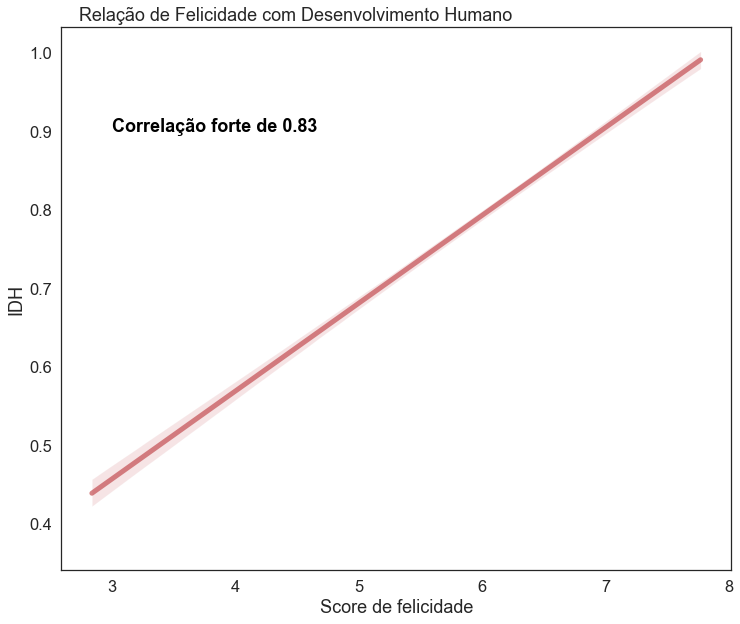

In [294]:
# gráfico de correlação
g = sns.regplot(x=df_merged['h_score'], y=df_merged['hdi_score'], line_kws={'color':'r','alpha':0.7,'lw':5}, scatter_kws={"color": "white"})
sns.set(rc={'figure.figsize':(12.0, 10.0)})
sns.set(font_scale=1.5)
sns.set_style("white")
plt.text(3.0, 0.9, "Correlação forte de 0.83", horizontalalignment='left', size='medium', color='black', weight='semibold')
g.set_title("Relação de Felicidade com Desenvolvimento Humano", y=1.0, x = 0.35);
g.set(xlabel="Score de felicidade", ylabel="IDH");
plt.show()

In [426]:
#dataframe com as médias de todos os anos
df_merged_medias = df_merged.groupby(['country']).mean()
df_merged_medias = df_merged_.reset_index()
df_merged_medias

,index,country,h_rank,h_score,hdi_rank,hdi_score
0,0,Afghanistan,152.00,3.4260,169.0,0.5056
1,1,Albania,106.40,4.7148,69.0,0.7906
2,2,Algeria,63.20,5.7642,91.0,0.7444
3,3,Angola,140.25,3.8900,148.0,0.5785
4,4,Argentina,31.60,6.4696,46.0,0.8418
...,...,...,...,...,...,...
136,136,Uruguay,30.80,6.4494,55.0,0.8126
137,137,Uzbekistan,45.40,6.0494,106.0,0.7112
138,138,Yemen,146.60,3.6520,179.0,0.4724
139,139,Zambia,112.00,4.6406,146.0,0.5768


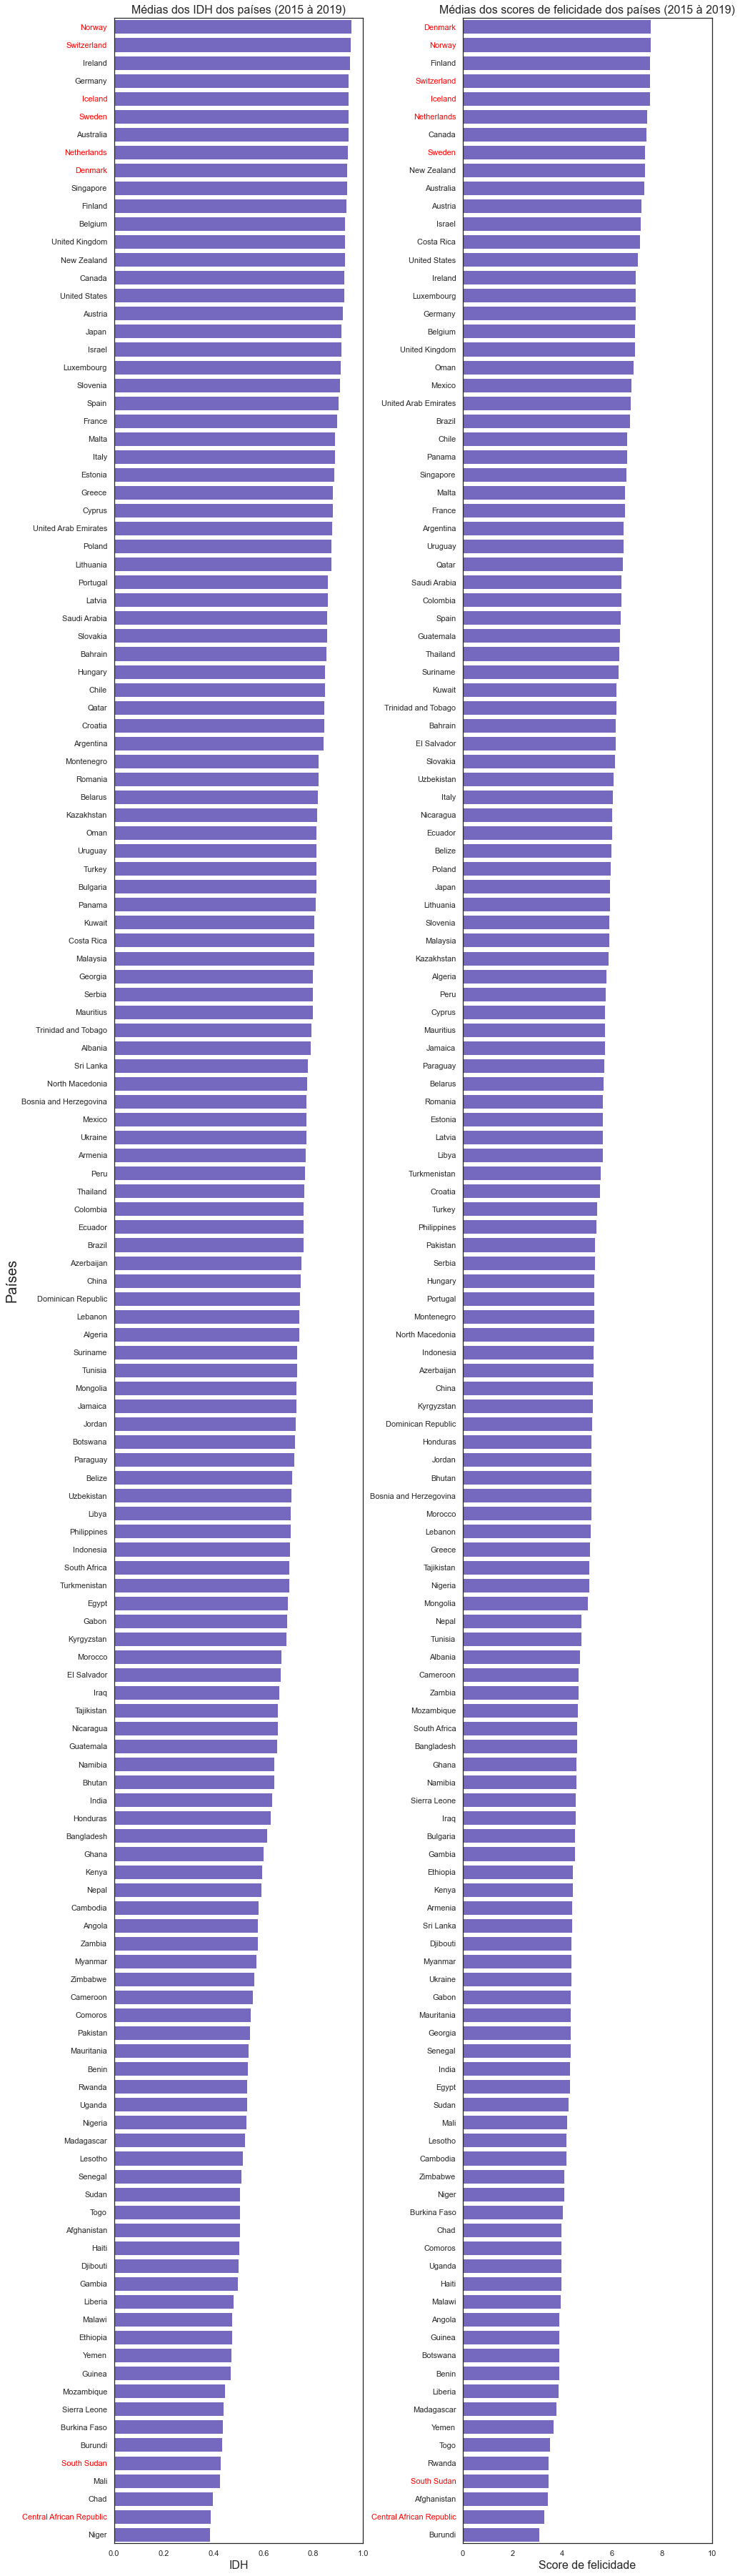

In [458]:
#gráfico em ordem decrescente dos scores
fig = plt.figure(figsize=(15, 65))
plt.subplots_adjust(wspace=0.4,hspace=0.0)
# Gráfico 1
ax1 = fig.add_subplot(121)
sns.barplot(y='country', x='hdi_score', data=df_merged_medias.sort_values(by = ['hdi_score'], ascending = False).reset_index(drop = True), color='slateblue')
ax1.set_xlim(0, 1)
ax1.set_xlabel('IDH', fontsize=16)
ax1.set_ylabel('Países', fontsize=20)
ax1.set_title('Médias dos IDH dos países (2015 à 2019)', fontsize=16)
ax1.get_yticklabels()[0].set_color("red")
ax1.get_yticklabels()[1].set_color("red")
ax1.get_yticklabels()[4].set_color("red")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[139].set_color("red")
ax1.get_yticklabels()[136].set_color("red")
# Gráfico 2
ax2 = fig.add_subplot(122)
sns.barplot(y='country', x='h_score', data=df_merged_medias.sort_values(by = ['h_score'], ascending = False).reset_index(drop = True), color='slateblue')
ax2.set_xlim(0, 10)
ax2.set_xlabel('Score de felicidade', fontsize=16)
ax2.set_ylabel('', fontsize=16)
ax2.set_title('Médias dos scores de felicidade dos países (2015 à 2019)', fontsize=16)
ax2.get_yticklabels()[0].set_color("red")
ax2.get_yticklabels()[1].set_color("red")
ax2.get_yticklabels()[3].set_color("red")
ax2.get_yticklabels()[4].set_color("red")
ax2.get_yticklabels()[5].set_color("red")
ax2.get_yticklabels()[7].set_color("red")
ax2.get_yticklabels()[139].set_color("red")
ax2.get_yticklabels()[137].set_color("red")
plt.show()

In [536]:
#ordenar a base
df_merged = df_merged.sort_values(by = ['country', 'year'], ascending = True).reset_index(drop = True)
df_merged.head(10)

,country,h_rank,h_score,year,hdi_rank,hdi_score
0,Afghanistan,153,3.575,2015,169,0.500
1,Afghanistan,154,3.360,2016,169,0.502
2,Afghanistan,154,3.360,2017,169,0.506
3,Afghanistan,145,3.632,2018,169,0.509
4,Afghanistan,154,3.203,2019,169,0.511
5,Albania,95,4.959,2015,69,0.788
6,Albania,109,4.655,2016,69,0.788
7,Albania,109,4.655,2017,69,0.790
8,Albania,112,4.586,2018,69,0.792
9,Albania,107,4.719,2019,69,0.795


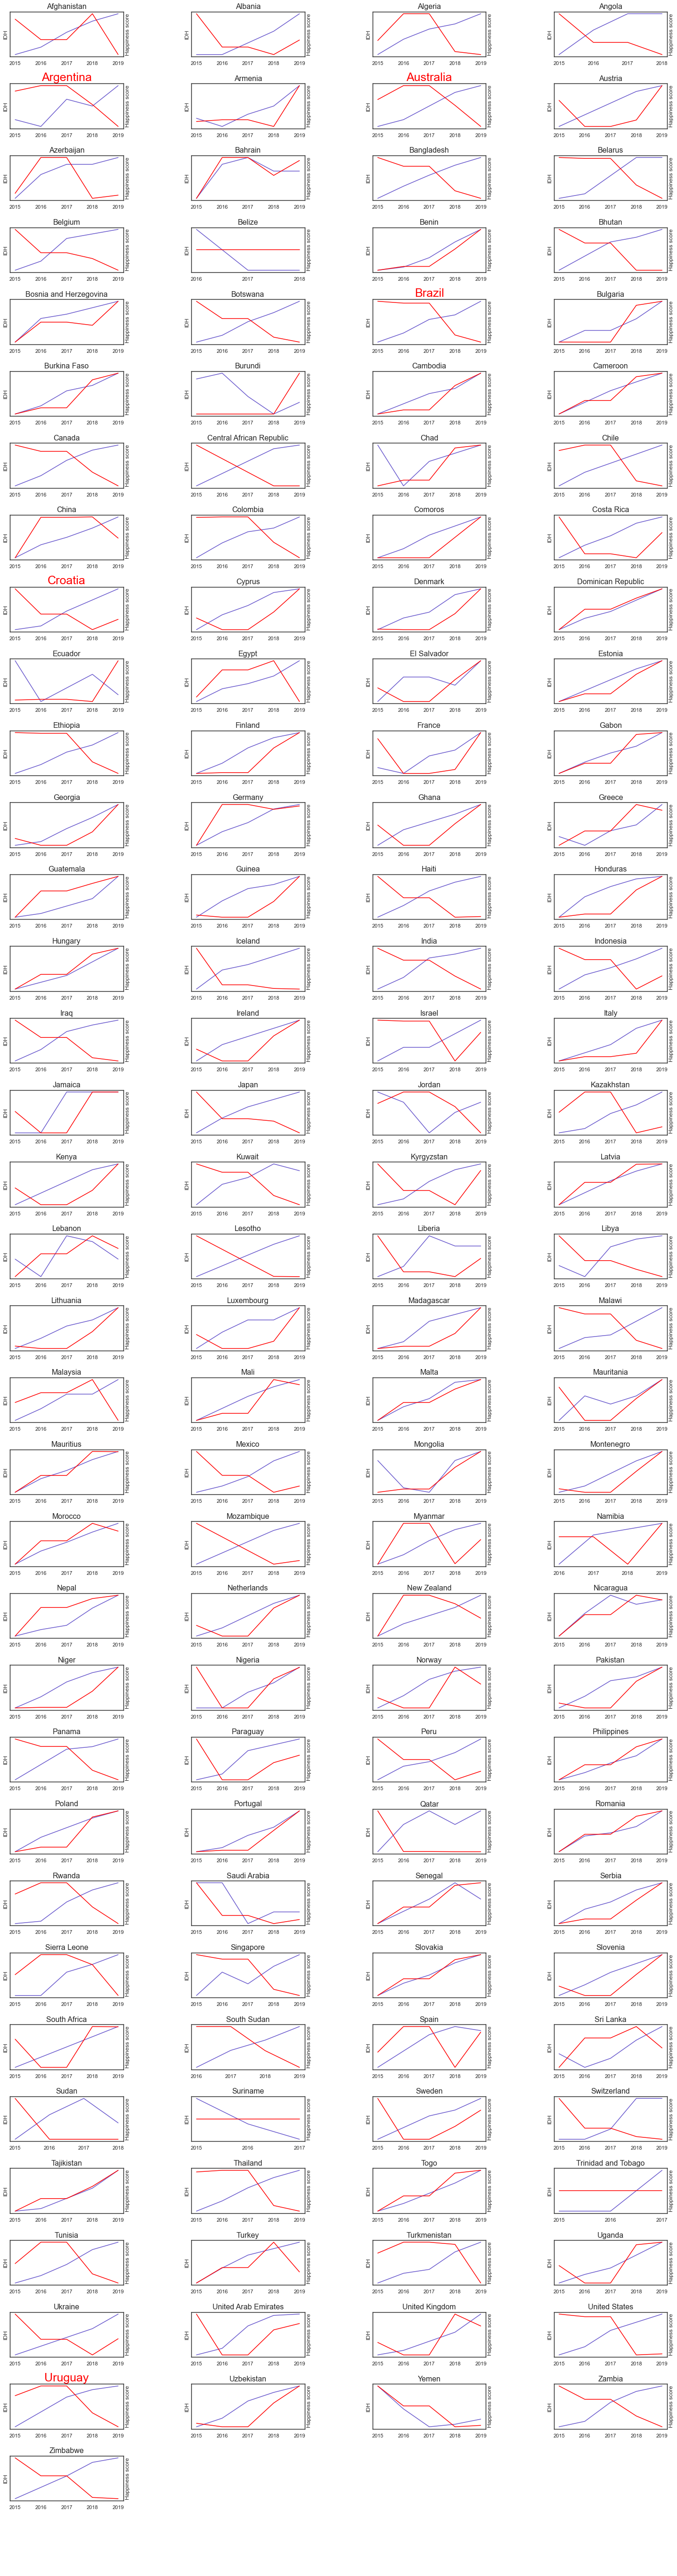

In [551]:
#gráfico de série historica para cada país
paises = df_merged[~df_merged.country.isin(['Djibouti', 'Gambia', 'North Macedonia', 'Oman'])]['country'].unique()
qtd_paises = paises.size
qtd_colunas = 4
qtd_linhas = math.floor(df_merged['country'].unique().size/qtd_colunas) + 1
fig = plt.figure(figsize=(25, 100))
plt.subplots_adjust(wspace=0.6,hspace=0.6)
plt.ylabel('IDH', fontsize=24)
plt.xlabel('Ano', fontsize=24)
plt.xticks([])
plt.yticks([])
plt.axis('off')
for i in range(0, qtd_paises):
    if (paises[i] not in ['Djibouti', 'Gambia', 'North Macedonia', 'Oman']):
        globals()['ax'+str(linha)+str(coluna)+str(1)] = fig.add_subplot(qtd_linhas, qtd_colunas, i+1)
        sns.lineplot(x='year', y='hdi_score', data=df_merged[df_merged.country == paises[i]], color='slateblue')
        globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], fontsize=16)
        globals()['ax'+str(linha)+str(coluna)+str(1)].set_ylabel('IDH')
        globals()['ax'+str(linha)+str(coluna)+str(1)].set_xlabel('')
        globals()['ax'+str(linha)+str(coluna)+str(1)].set_yticks([])
        globals()['ax'+str(linha)+str(coluna)+str(1)].set_xticks([2015, 2016, 2017, 2018, 2019])
        globals()['ax'+str(linha)+str(coluna)+str(2)] = globals()['ax'+str(linha)+str(coluna)+str(1)].twinx()
        sns.lineplot(x='year', y='h_score', data=df_merged[df_merged.country == paises[i]], color='red')
        globals()['ax'+str(linha)+str(coluna)+str(2)].set_ylabel('Happiness score')
        globals()['ax'+str(linha)+str(coluna)+str(2)].set_yticks([])
        if (paises[i] == 'Brazil'):
            globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], color='red', fontsize=25)

        if (paises[i] == 'Uruguay'):
            globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], color='red', fontsize=25)

        if (paises[i] == 'Croatia'):
            globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], color='red', fontsize=25)

        if (paises[i] == 'Argentina'):
            globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], color='red', fontsize=25)

        if (paises[i] == 'Australia'):
            globals()['ax'+str(linha)+str(coluna)+str(1)].set_title(paises[i], color='red', fontsize=25)

## Storytelling:
- :
    - **Felicidade** tem a ver com desenvolvimento humano em relação à **saúde, educação e renda**? 
    - Para responder essa pergunta precisamos de **métricas**.
    - Para a nossa felicidade existe uma **medida de felicidade** que é publicada no Relatório Mundial da Felicidade.
        - O Relatório Mundial da Felicidade é uma pesquisa notável que indica o **estado de felicidade global** em mais de 150 países com base na **satisfação dos cidadãos em relação às suas vidas**. O propósito da pesquisa é entender mais a fundo sobre o **bem-estar** e usar os dados para acompanhar a satisfação e qualidade de vida ao redor do mundo.  O resultado do ranking global de felicidade depende, exclusivamente, da avaliação individual das pessoas nos últimos três anos. Então, ao falarmos da edição de 2020, o índice considera os dados de 2017 a 2019. Simplificando, é como pedir para alguém responder, de **0 a 10, quão satisfeito está com a sua vida hoje**, onde '10' representa a melhor situação possível e '0' representa a pior situação possível.
    - Também existe uma medida de **desenvolvimento humano** que é o **Índice de Desenvolvimento Humano**.
        - O índice de Desenvolvimento Humano (IDH) é um índice composto que mede o desempenho médio em três **dimensões básicas do desenvolvimento humano**: 
        - **uma vida longa e saudável**: expectativa de vida ao nascer;
        - **o acesso ao conhecimento**: anos Médios de estudo e anos esperados de escolaridade;
        - **um padrão de vida decente**: PIB (PPC) per capita;
        - É uma medida comparativa usada para classificar os países pelo seu **grau de "desenvolvimento humano"** e para ajudar a classificar os países como desenvolvidos (desenvolvimento humano muito alto), em desenvolvimento (desenvolvimento humano médio e alto) e subdesenvolvidos (desenvolvimento humano baixo).
        - O desenvolvimento humano é classificado conforme o enquadramento do IDH em um dos quatro intervalos abaixo.
            - IDH menor que 0,550: desenvolvimento baixo;
            - IDH de 0,550 à  0,699: desenvolvimento médio;
            - IDH de 0,700 à 0,799: desenvolvimento alto;
            - \IDH maior que 0,800: desenvolvimento muito alto;

    - Mas, o quanto **"desenvolvimento humano"** e **"felicidade"** estão **relacionados** em termos dos índices?
    - Eles estão muito relacionados e possuem uma **correlação forte de 0.83**, ou seja, para países com pontuações altas de felicidade os IDH's são altos.
        - <img src = "correlacao_idh_hap.png">
    - Países com **Índice de Desenvolvimento Humano Alto**, possuem **pontuações de felicidade altas**:
        - <img src = "medias_dos_scores.png">
    - Mas... crescimento em saúde, educação e renda significa crescimento em felicidade?
    - Nem sempre, vemos individualmente em alguns países um **crescimento do desenvolvimento humano**, porém a **felicidade diminuiu**... 
         - <img src = "serie_paises.png"> 
    - Então governantes, líderes, precisamos sim **melhorar as condições de saúde, educação e renda** dos países para melhorar o desenvolvimento humano e a percepção de felicidade das pessoas, porém felicidade não é somente isso, **felicidade também possui fatores subjetivos**.